In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import time_evolutor as te
import plotting as p

import sys
sys.path.append('/../../temp_prog/')
import tur_calculator as tc

In [2]:
#------------------SETUP-------------------

T_L = 25 
T_R = 10
V_B = 30
eps = 50
u = 250
gamma = 1
delta_gamma = 0.04 #0.04
delta_epsilon = 0.04 #0.04

INPUT = {
    'eps': eps,
    'omega': 0, 
    'u': u, 
    'V_B': V_B,
    'gamma': gamma,  
    'T_L': T_L,
    'T_R': T_R,
    'delta_gamma': delta_gamma,
    'delta_epsilon': delta_epsilon,
}

initial = [1/4,1/4,1/4,1/4,0,0]         #beginns with both QDs empty
ti_array = np.linspace(0,1e5,10000)

In [ ]:
importlib.reload(te)
sys, liouvillian, dim, eval_j, left_ev, right_ev, nleads = te.calculate_paper_meta(initial, ti_array, **INPUT, just_lio=True)
print(sys.current[0])
print(sys.current[1])

[[ 1.  0.  0. -0.  0.  0.]
 [-0.  1.  0. -0. -0.  0.]
 [ 0.  0.  1.  0. -0. -0.]
 [-0. -0. -0.  1.  0.  0.]
 [ 0. -0.  0.  0.  1.  0.]
 [ 0.  0. -0. -0.  0.  1.]]
check l1 is identity: [-0.5 -0.5 -0.5 -0.5 -0.   0. ]
0.03787769438531496
-0.03787769438531495


In [4]:
#Theoretically calculating my_rho

muL = -V_B/2
muR = V_B/2

def fermi(mu, E, T):
    return 1/(1+np.exp((E-mu)/T))

def avg_fermi(eps):
    return (fermi(muL, eps, T_L)+fermi(muR, eps, T_R))/2

avg_fermi_e = avg_fermi(eps)
avg_fermi_eU = avg_fermi(eps+u)

my_rho1 = np.zeros(dim)
my_rho2 = np.zeros(dim)

#filling up my_rho:
my_rho1[0] = 1-avg_fermi_e
my_rho1[1] = avg_fermi_e
my_rho2[2] = 1-avg_fermi_eU
my_rho2[2] = avg_fermi_eU

In [5]:
# -----------------------------PARTICLE CURRENT-------------------------------------
# qmeq solution for stationary current (at left lead)
I_ss = sys.current[0]
print('I_ss: ', I_ss)
print('right lead? ', sys.current[1])

# reset current    
sys.current[:] = np.zeros(nleads)
sys.energy_current[:] = np.zeros(nleads)

# set stationary state to my_rho value
sys.phi0[:] = np.real(my_rho1[:])

# calculate current (also calculates energy and heat currents)
sys.appr.generate_current() # calculates current both ways
J_QH_tot = sys.heat_current
I_test = sys.current[0]
print(I_test)
I = sys.current_noise[0] 
I_var = sys.current_noise[1]
#--------------------------------------------
# take QmeQ heat current at left lead   
J_QH = J_QH_tot[0]
print('J_QH: ', J_QH)

#Power
P = I*V_B

I_ss:  0.03787769438531496
right lead?  -0.03787769438531495
0.08747837694036187
J_QH:  5.688099484600389


In [6]:
#Calculate TUR
importlib.reload(tc)
TUR, eff_carnot, eff, sigma = tc.calculate_single_tur(T_L, T_R, I, I_var, J_QH, P)

In [7]:
print('I', I)
print('P', P)
print('I_var', I_var)
print('heat current: ', J_QH)
print('sigma: ', sigma)
print('eff: ', eff)
print('TUR', TUR)

I 0.08747837694036187
P 2.624351308210856
I_var 0.15290214065585206
heat current:  5.688099484600389
sigma:  0.07885083825493779
eff:  0.4613757750397761
TUR 1.5755001434678912


In [8]:
i_1 = gamma*(fermi(muL, eps, T_L)-fermi(muR, eps, T_R))
i_2 = gamma*(fermi(muL, eps+u, T_L)-fermi(muR, eps+u, T_R))

print(i_1, i_2)

0.039826189591990496 3.372003444311221e-06


49.96 50.04


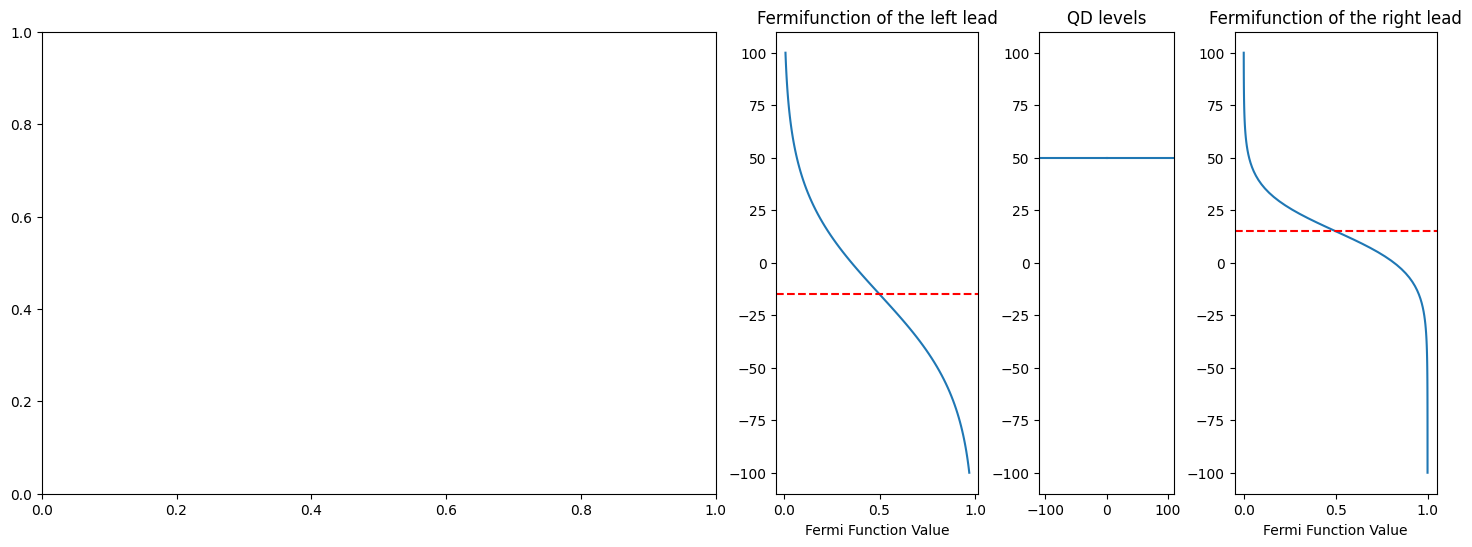

In [9]:
epsilons = np.linspace(-100,100,100)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(18, 6), gridspec_kw={'width_ratios': [10, 3, 2, 3]}) 

eps1 = eps-delta_epsilon
eps2 =eps+delta_epsilon
print(eps1, eps2)

importlib.reload(p)
p.plot_fermi_function(epsilons, muL, T_L, ax2, "Fermifunction of the left lead")
p.plot_double_qd_leves(epsilons, eps1, eps2, ax3, 'QD levels')
p.plot_fermi_function(epsilons, muR, T_R, ax4, "Fermifunction of the right lead")

plt.show()